In [2]:
import pandas as pd

In [51]:
train=pd.read_csv('train_qWM28Yl.csv')
test=pd.read_csv('test_zo1G9sv.csv')
submission=pd.read_csv('sample_submission_KvRh9Sx.csv')

In [52]:
train.shape,test.shape

((58592, 44), (39063, 43))

In [53]:
#combine the data
combined=pd.concat([train,test],ignore_index=True)

In [54]:
combined.shape

(97655, 44)

In [10]:
# curate the list of cat variables

combined.select_dtypes(include='object').columns

Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')

In [18]:
cols=['area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert']

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
import warnings
warnings.filterwarnings('ignore')

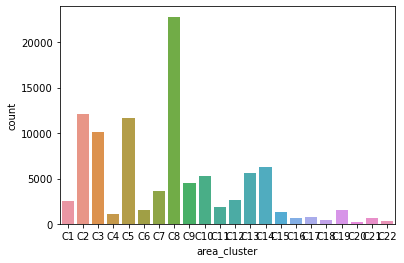

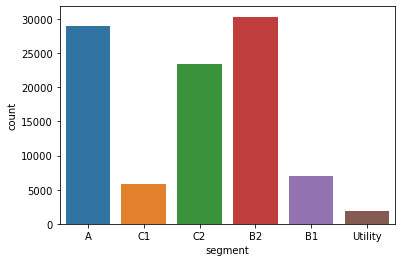

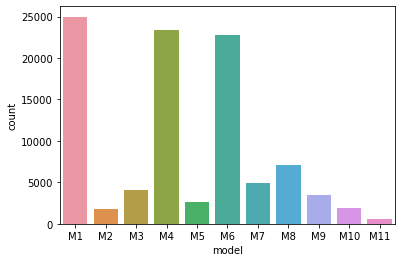

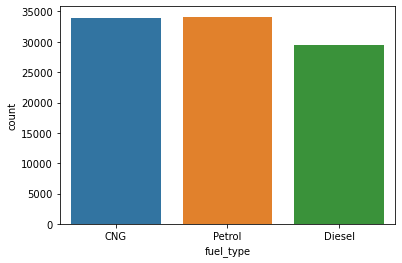

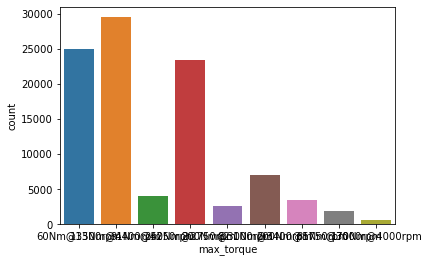

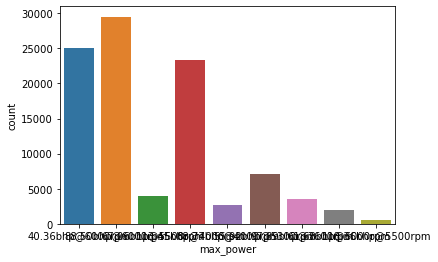

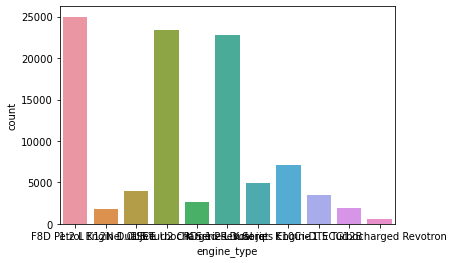

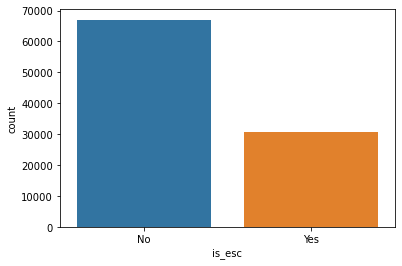

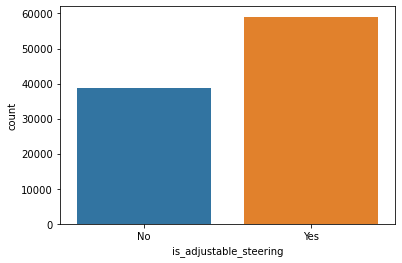

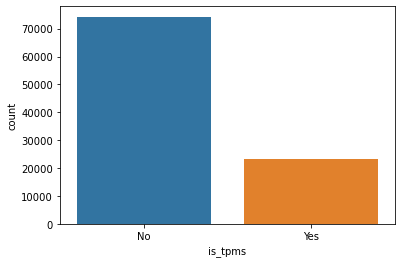

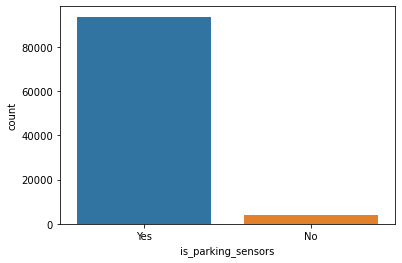

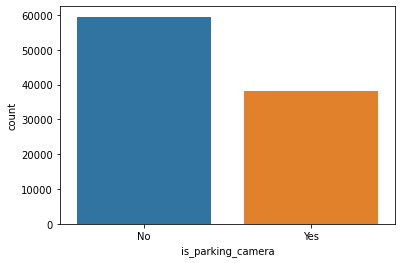

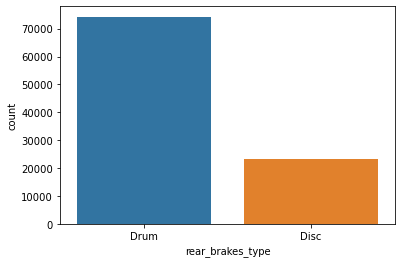

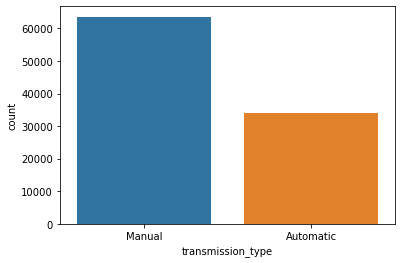

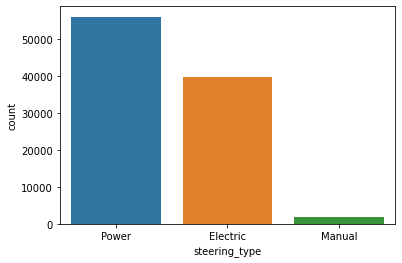

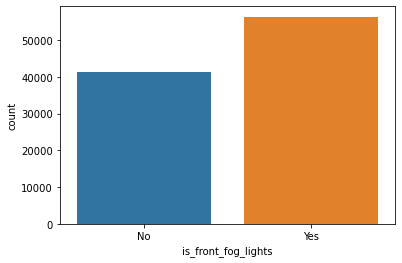

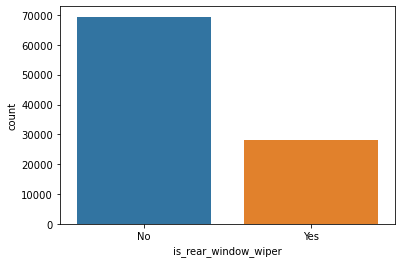

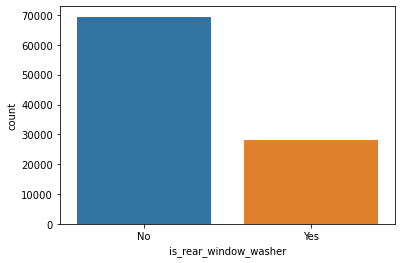

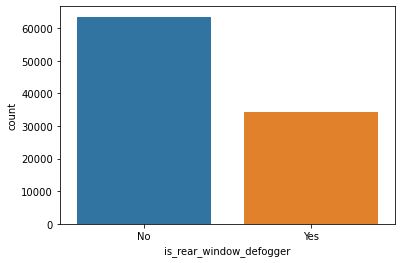

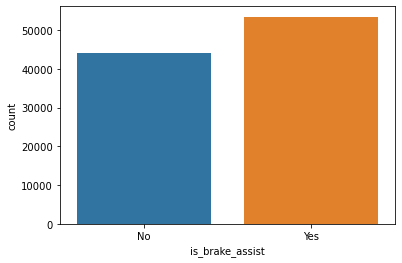

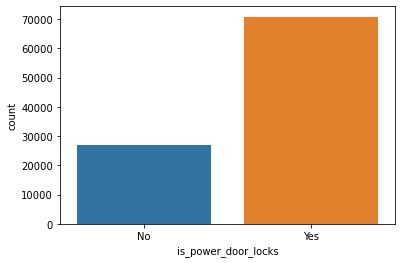

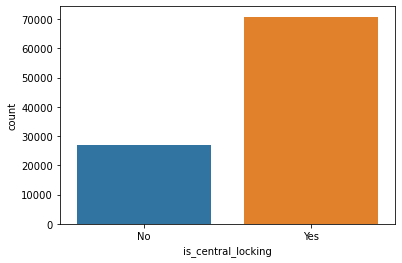

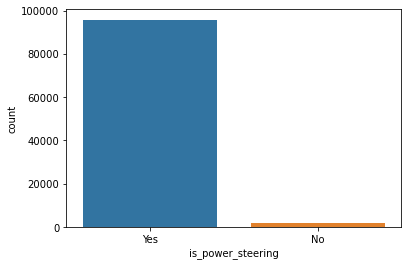

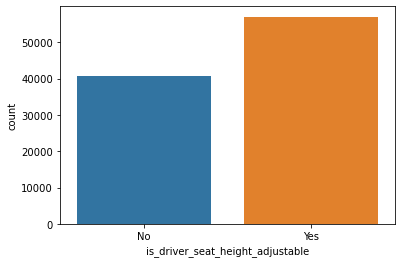

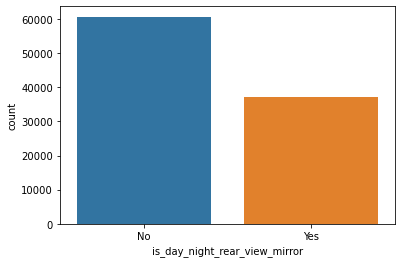

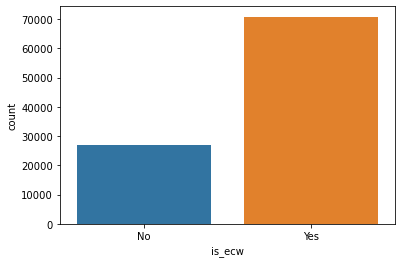

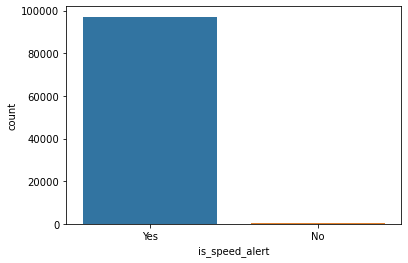

In [19]:
for x in cols:
    sns.countplot(x,data=combined)
    plt.show()

<AxesSubplot:>

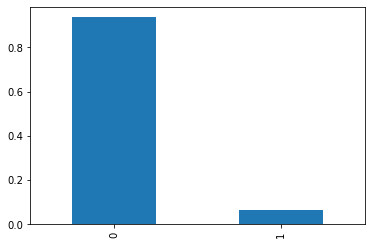

In [23]:
train['is_claim'].value_counts(normalize=True).plot(kind='bar')

In [26]:
train[train['is_claim']==1].describe(include='object')

,policy_id,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
count,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,...,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748
unique,3748,22,6,11,3,9,9,11,2,2,...,2,2,2,2,2,2,2,2,2,2
top,ID00013,C8,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,No,Yes,...,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
freq,1,954,1256,939,1363,1220,1220,939,2551,2370,...,2646,2418,2136,2757,2757,3675,2269,2267,2757,3733


In [27]:
combined.isnull().sum()

policy_id                               0
policy_tenure                           0
age_of_car                              0
age_of_policyholder                     0
area_cluster                            0
population_density                      0
make                                    0
segment                                 0
model                                   0
fuel_type                               0
max_torque                              0
max_power                               0
engine_type                             0
airbags                                 0
is_esc                                  0
is_adjustable_steering                  0
is_tpms                                 0
is_parking_sensors                      0
is_parking_camera                       0
rear_brakes_type                        0
displacement                            0
cylinder                                0
transmission_type                       0
gear_box                          

In [28]:
combined.ncap_rating.unique()

array([0, 2, 3, 5, 4], dtype=int64)

In [29]:
combined['ncap_rating']=combined['ncap_rating'].astype('object')

In [30]:
num_cols=['age_of_car','age_of_policyholder','displacement','gross_weight','height','length','policy_tenure','population_density',
         'turning_radius','width']

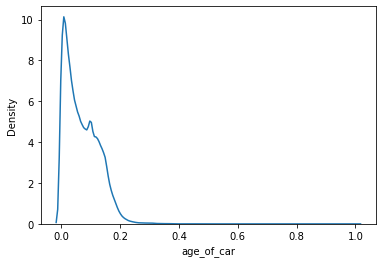

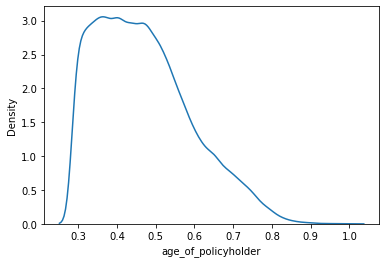

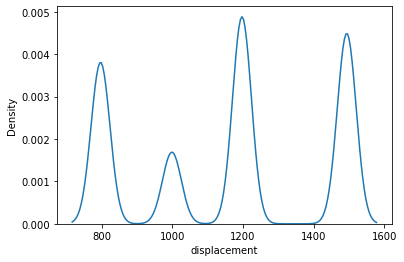

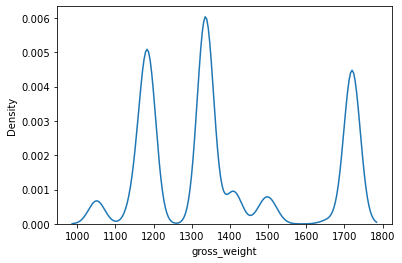

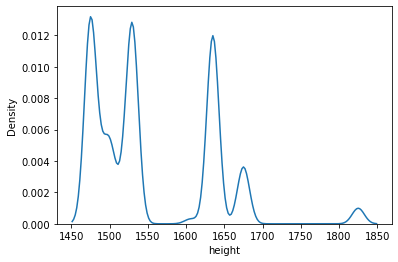

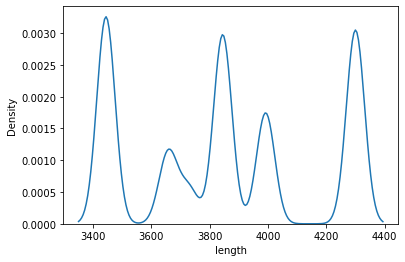

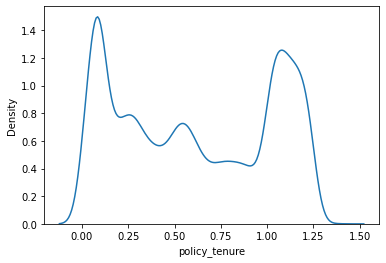

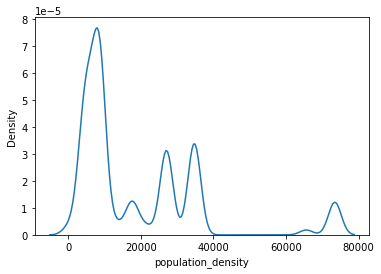

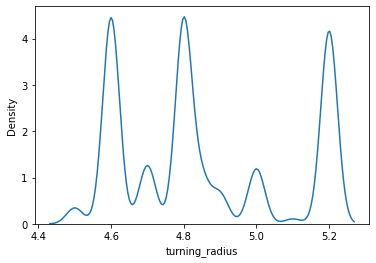

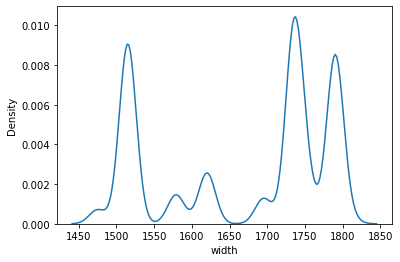

In [31]:
for x in num_cols:
    sns.kdeplot(combined[x])
    plt.show()

In [ ]:
#bivariate
for i in num_cols:
    sns.boxplot(combined['is_claim'],combined[i])
    plt.show()

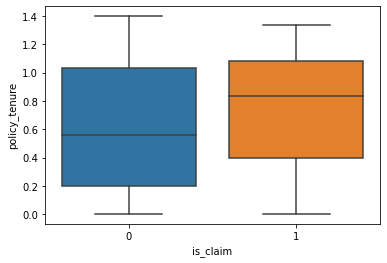

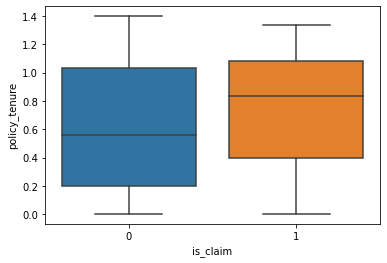

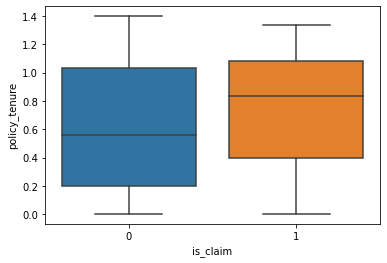

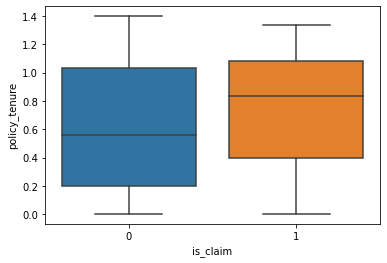

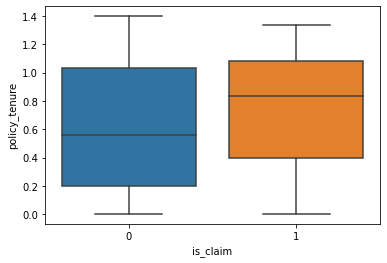

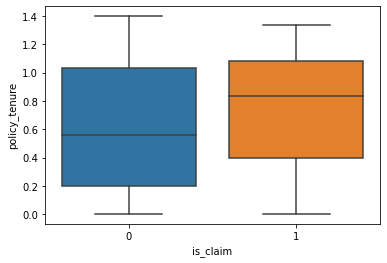

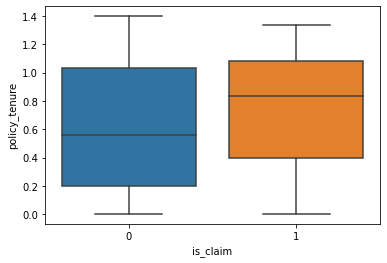

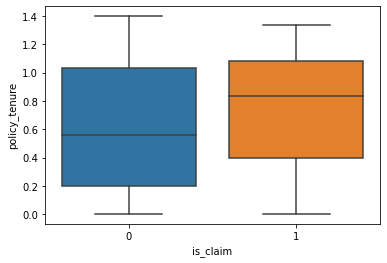

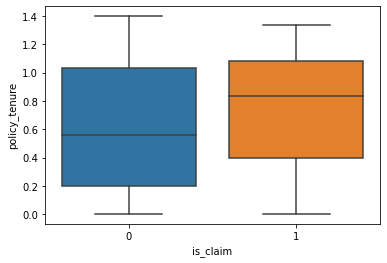

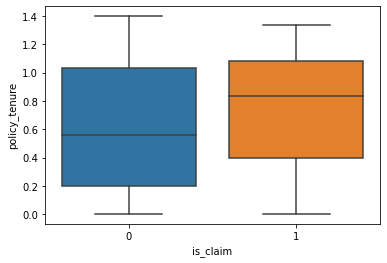

In [33]:
for x in num_cols:
    sns.boxplot(train['is_claim'],combined[i])
    plt.show()

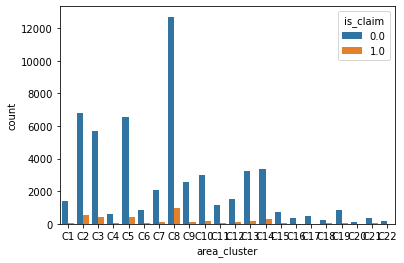

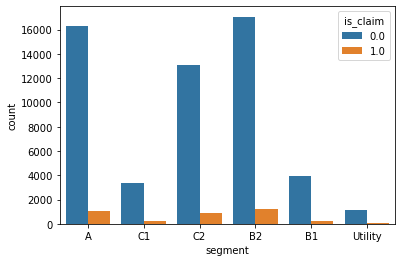

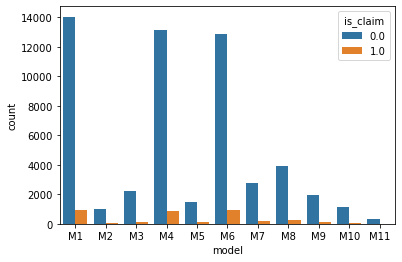

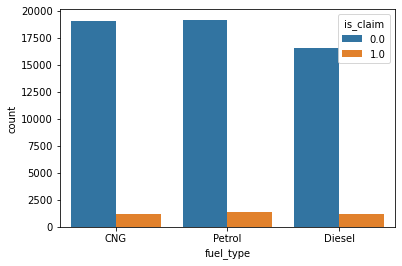

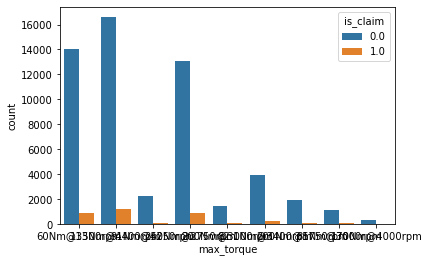

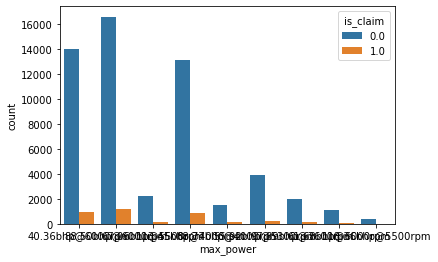

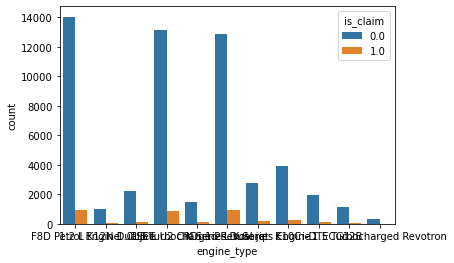

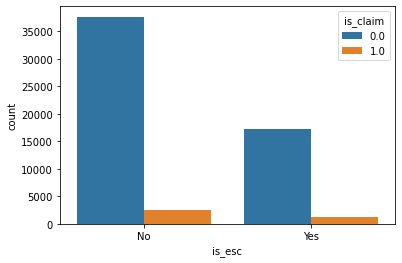

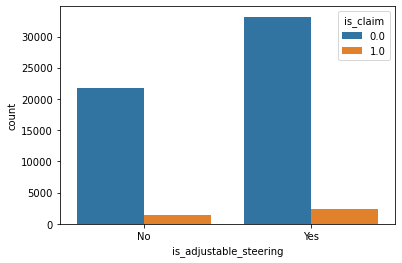

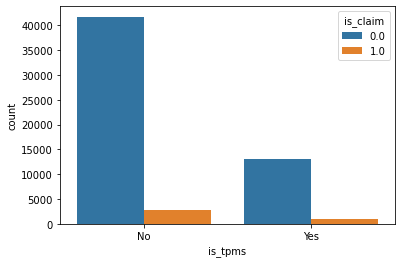

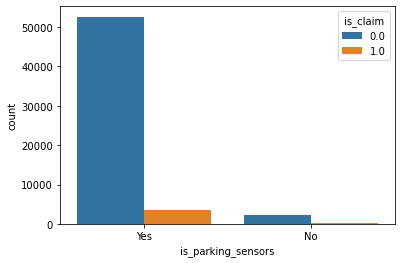

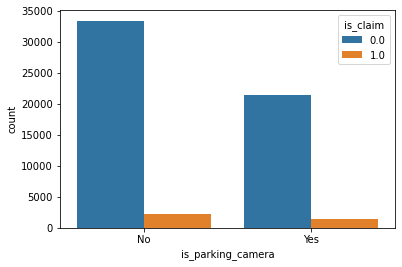

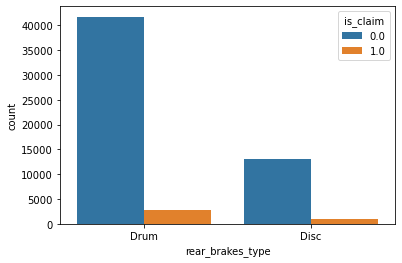

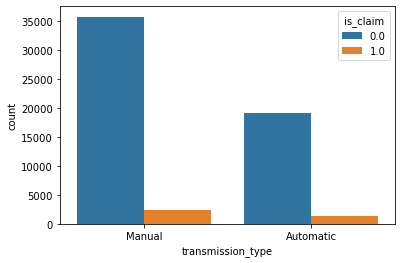

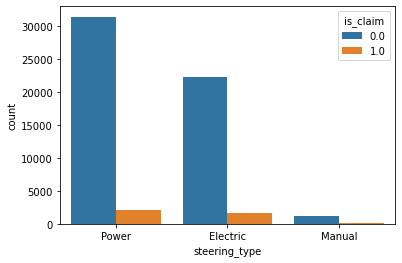

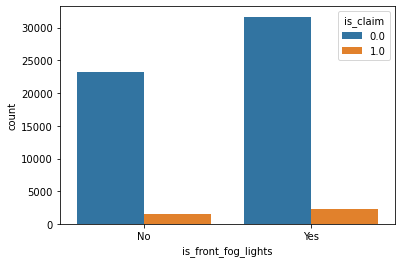

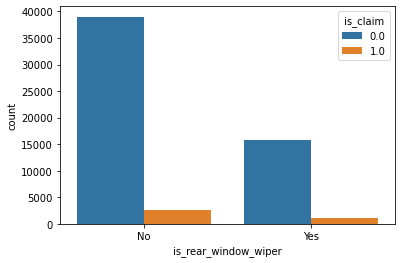

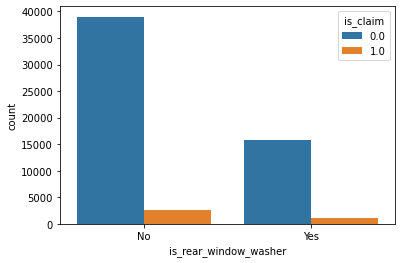

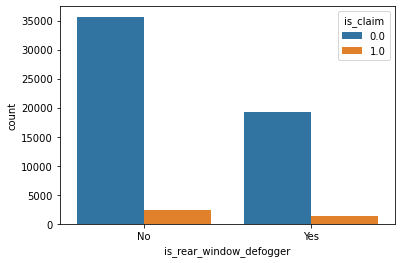

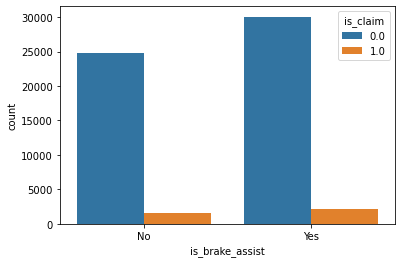

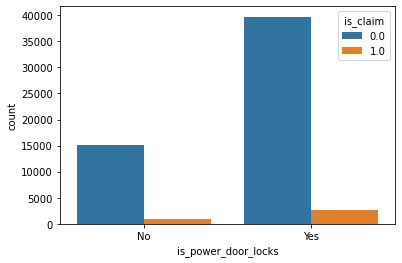

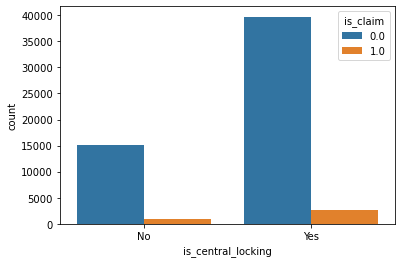

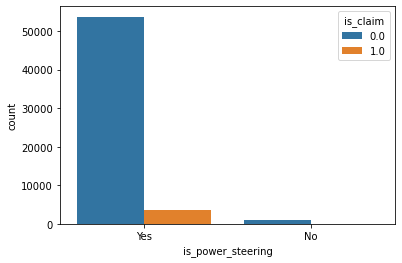

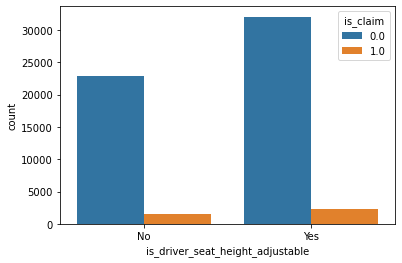

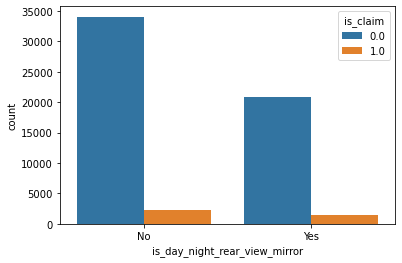

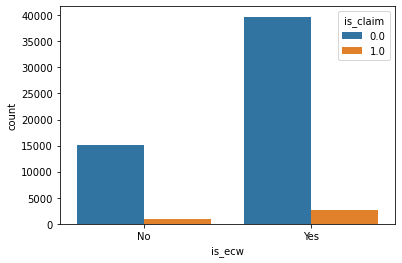

In [35]:
for i in cols[:-1]:
    sns.countplot(combined.loc[:,i],hue=combined.is_claim)
    plt.show()

In [36]:
## Feature engineering
combined.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0.0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0.0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0.0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0.0


In [ ]:
combined['is']

In [38]:
l=[]
for x in combined.columns:
    if 'is' in x:
        l.append(x)

In [40]:
l.remove('displacement')

In [42]:
l.remove('transmission_type')

In [50]:
l.remove('is_claim')

In [55]:
for x in l:
    combined[x]=combined[x].map({'Yes':1,'No':0})

In [60]:
combined.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,1,1,0,1,1,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0.0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,0,0,0,0,1,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0.0


In [57]:
# converting column starting with 'is'
for x in combined.columns:
    if x.startswith('is'):
        print(x)

is_esc
is_adjustable_steering
is_tpms
is_parking_sensors
is_parking_camera
is_front_fog_lights
is_rear_window_wiper
is_rear_window_washer
is_rear_window_defogger
is_brake_assist
is_power_door_locks
is_central_locking
is_power_steering
is_driver_seat_height_adjustable
is_day_night_rear_view_mirror
is_ecw
is_speed_alert
is_claim


In [59]:
pd.set_option('display.max_columns',50)

In [62]:
# torque and bhp
combined[['rpm','torque']]=combined.max_power.str.split('@',expand=True)

In [65]:
combined=combined.rename(columns={'rpm':'bhp','torque':'rpm_power'})

In [66]:
# torque and bhp
combined[['nm','rpm_torque']]=combined.max_torque.str.split('@',expand=True)

In [67]:
combined.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,bhp,rpm_power,nm,rpm_torque
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36bhp,6000rpm,60Nm,3500rpm
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36bhp,6000rpm,60Nm,3500rpm
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36bhp,6000rpm,60Nm,3500rpm
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,1,1,0,1,1,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0.0,88.50bhp,6000rpm,113Nm,4400rpm
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,0,0,0,0,1,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0.0,67.06bhp,5500rpm,91Nm,4250rpm


In [70]:
combined['bhp']=combined['bhp'].apply(lambda x:float(x[:-3]))

In [71]:
combined['rpm_power']=combined['rpm_power'].apply(lambda x:float(x[:-3]))

In [72]:
combined['rpm_torque']=combined['rpm_torque'].apply(lambda x:float(x[:-3]))

In [73]:
combined['nm']=combined['nm'].apply(lambda x:float(x[:-3]))

In [75]:
combined.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,bhp,rpm_power,nm,rpm_torque
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36,6000.0,6.0,3500.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36,6000.0,6.0,3500.0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36,6000.0,6.0,3500.0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,1,1,0,1,1,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0.0,88.50,6000.0,11.0,4400.0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,0,0,0,0,1,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0.0,67.06,5500.0,9.0,4250.0


In [76]:
for i in [combined]:
    i['weight_per_unit']=i['gross_weight']/(i['height']*i['width']*i['length'])
    i['per_unit_power']=i['rpm_power']/i['bhp']
    i['per_unit_torque']=i['rpm_torque']/i['nm']
    i['age']=i['age_of_car']/i['age_of_policyholder']

In [80]:
import numpy as np

In [82]:
combined.select_dtypes(include=np.number).columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'displacement', 'cylinder', 'gear_box',
       'turning_radius', 'length', 'width', 'height', 'gross_weight',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim', 'bhp',
       'rpm_power', 'nm', 'rpm_torque', 'weight_per_unit', 'per_unit_power',
       'per_unit_torque', 'age'],
      dtype='object')

In [83]:
num_cols=['age_of_car','age_of_policyholder','gross_weight','height','length','policy_tenure','population_density',
         'turning_radius','width','bhp','rpm_power','nm','rpm_torque','weight_per_unit','per_unit_power','per_unit_torque'
         ,'age']

In [84]:
len(num_cols)

17

In [85]:
import scipy.stats as stats

In [86]:
sig_feat=[]
for i in num_cols:
    zero=combined.loc[combined.is_claim==0,i]
    one=combined.loc[combined.is_claim==1,i]
    teststats,pvalue=stats.ttest_ind(zero,one)
    if pvalue<0.05:
        sig_feat.append(i)

In [87]:
sig_feat

['age_of_car',
 'age_of_policyholder',
 'policy_tenure',
 'population_density',
 'width',
 'age']

In [88]:
#categorical target encoding
! pip install category_encoders

In [89]:
import category_encoders as ce

In [91]:
combined.select_dtypes(include='object').columns

Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'rear_brakes_type',
       'transmission_type', 'steering_type'],
      dtype='object')

In [92]:
cat_cols = ['area_cluster', 'segment', 'model', 'fuel_type',
       'engine_type', 'rear_brakes_type',
       'transmission_type', 'steering_type', 'ncap_rating']

In [93]:
# Split the daaaaaaata into train and test

newtrain = combined.loc[0:train.shape[0]-1, :]
newtest = combined.loc[train.shape[0]:, :]

newtrain.shape, newtest.shape

((58592, 52), (39063, 52))

In [94]:
# dropping target from newtest

newtrain.drop(['policy_id','max_power','max_torque'],axis=1,inplace=True)
newtest.drop(['policy_id','max_power','max_torque','is_claim'],axis=1,inplace=True)

In [95]:
newtrain.shape, newtest.shape

((58592, 49), (39063, 48))

In [96]:
# Target Encoding
# import category_encoders as ce



cat_cols = ['area_cluster', 'segment', 'model', 'fuel_type',
       'engine_type', 'rear_brakes_type',
       'transmission_type', 'steering_type', 'ncap_rating']

tgt_encoder = ce.TargetEncoder(cols = cat_cols)



X = newtrain.drop('is_claim',axis=1)
y = newtrain['is_claim']


newx = tgt_encoder.fit_transform(X,y)
newtest = tgt_encoder.transform(newtest)


In [97]:
newx.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,bhp,rpm_power,nm,rpm_torque,weight_per_unit,per_unit_power,per_unit_torque,age
0,0.515874,0.05,0.644231,0.051771,4990,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,0.063871,796,3,0.063854,5,0.062026,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0.062418,40.36,6000.0,6.0,3500.0,1.539304e-07,148.662042,583.333333,0.077612
1,0.672619,0.02,0.375000,0.070825,27003,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,0.063871,796,3,0.063854,5,0.062026,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0.062418,40.36,6000.0,6.0,3500.0,1.539304e-07,148.662042,583.333333,0.053333
2,0.841110,0.02,0.384615,0.070972,4076,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,0.063871,796,3,0.063854,5,0.062026,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0.062418,40.36,6000.0,6.0,3500.0,1.539304e-07,148.662042,583.333333,0.052000
3,0.900277,0.11,0.432692,0.076692,21622,1,0.064099,0.074074,0.066384,0.074074,2,1,1,0,1,1,0.063871,1197,4,0.064181,5,0.066873,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,0.064994,88.50,6000.0,11.0,4400.0,1.271313e-07,67.796610,400.000000,0.254222
4,0.596403,0.11,0.634615,0.057745,34738,2,0.060389,0.053940,0.066384,0.053940,2,0,0,0,0,1,0.063871,999,3,0.064181,5,0.066873,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,0.064994,67.06,5500.0,9.0,4250.0,1.315795e-07,82.016105,472.222222,0.173333


In [99]:
# Apply StandardScaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

newx.select_dtypes(include = np.number).columns

cols = ['policy_tenure', 'population_density', 'displacement', 'turning_radius',
        'length', 'width', 'height', 'gross_weight', 'bhp', 'rpm_power',
        'nm', 'rpm_torque', 'weight_per_unit', 'per_unit_power',
        'per_unit_torque']

for i in cols:
    newx.loc[:, i] = sc.fit_transform(pd.DataFrame(newx.loc[:, i]))
    newtest.loc[:, i] = sc.fit_transform(pd.DataFrame(newtest.loc[:, i]))

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [102]:

# List of models
def base_models():
    models=dict()
    models['lg']=LogisticRegression()
    models['dtree']=DecisionTreeClassifier()
    models['rf']=RandomForestClassifier()
    models['adaboost']=AdaBoostClassifier()
    models['gbm']=GradientBoostingClassifier()
    models['xgb']=XGBClassifier()
    models['lgbm']=LGBMClassifier()
    return models

In [104]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [107]:
def eval_models(model):
    cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=2)
    scores=cross_val_score(estimator=model,X=newx,y=y,scoring='f1',cv=cv,error_score='raise',n_jobs=-1)
    return scores

In [108]:
#build the models
models=base_models()

In [114]:
#list for result and model names
result,names=list(),list()

for name,model in models.items():
    scores=eval_models(model)
    result.append(scores) #store f1 score
    names.append(name) # store model name
    print('>%s %.3f (%.3f)' % (name,np.mean(result) ,np.std(result)))

>lg 0.000 (0.000)
>dtree 0.041 (0.041)
>rf 0.034 (0.035)
>adaboost 0.025 (0.034)
>gbm 0.020 (0.032)
>xgb 0.017 (0.030)
>lgbm 0.015 (0.028)


# smote for handling imbalance

In [115]:
from imblearn.over_sampling import SMOTE

In [116]:
smote=SMOTE()
smotex,smotey=smote.fit_resample(newx,y)

In [117]:
def base_models():
    models=dict()
    models['lg']=LogisticRegression()
    models['dtree']=DecisionTreeClassifier()
    models['rf']=RandomForestClassifier()
    models['adaboost']=AdaBoostClassifier()
    models['gbm']=GradientBoostingClassifier()
    models['xgb']=XGBClassifier()
    models['lgbm']=LGBMClassifier()
    return models

In [118]:
def eval_models(model):
    cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=2)
    scores=cross_val_score(estimator=model,X=smotex,y=smotey,scoring='f1',cv=cv,error_score='raise',n_jobs=-1)
    return scores

In [119]:
#build the models
models=base_models()

In [120]:
#list for result and model names
result,names=list(),list()

for name,model in models.items():
    scores=eval_models(model)
    result.append(scores) #store f1 score
    names.append(name) # store model name
    print('>%s %.3f (%.3f)' % (name,np.mean(result) ,np.std(result)))

>lg 0.587 (0.004)
>dtree 0.752 (0.166)
>rf 0.813 (0.160)
>adaboost 0.790 (0.144)
>gbm 0.806 (0.133)
>xgb 0.832 (0.134)
>lgbm 0.849 (0.131)


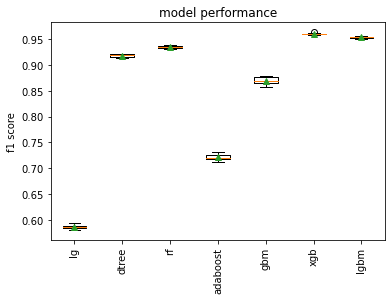

In [121]:
plt.boxplot(result,labels=names,showmeans=True)
plt.xticks(rotation=90)
plt.ylabel('f1 score')
plt.title('model performance')
plt.show()

In [124]:
rf=RandomForestClassifier()
pred=[]
kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)


for train_index,test_index in kfold.split(smotex,smotey):
    xtrain=smotex.loc[train_index]
    ytrain=smotey.loc[train_index]
    pred.append(rf.fit(xtrain,ytrain).predict(newtest))

In [125]:
pred

[array([1., 0., 0., ..., 0., 1., 0.]),
 array([0., 0., 0., ..., 0., 1., 0.]),
 array([1., 0., 0., ..., 0., 1., 0.]),
 array([0., 0., 0., ..., 0., 1., 0.]),
 array([1., 0., 0., ..., 0., 1., 0.]),
 array([1., 0., 0., ..., 0., 1., 0.]),
 array([1., 0., 0., ..., 0., 1., 0.]),
 array([0., 1., 0., ..., 0., 1., 0.]),
 array([0., 0., 0., ..., 0., 1., 0.]),
 array([1., 0., 0., ..., 0., 1., 0.])]

In [129]:
finalpred=pd.DataFrame(pred).T.mode(axis=1)[0]


In [130]:
finalpred

0        1.0
1        0.0
2        0.0
3        0.0
4        1.0
        ... 
39058    0.0
39059    0.0
39060    0.0
39061    1.0
39062    0.0
Name: 0, Length: 39063, dtype: float64

In [131]:
sub=pd.DataFrame({'policy_id':test.policy_id,'is_claim':finalpred})

In [133]:
sub.to_csv('rf_f1.csv',index=False)

In [135]:
pred=[]
rf=XGBClassifier()
pred=[]
kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)


for train_index,test_index in kfold.split(smotex,smotey):
    xtrain=smotex.loc[train_index]
    ytrain=smotey.loc[train_index]
    pred.append(rf.fit(xtrain,ytrain).predict(newtest))

In [136]:
finalpred=pd.DataFrame(pred).T.mode(axis=1)[0]


In [137]:
sub=pd.DataFrame({'policy_id':test.policy_id,'is_claim':finalpred})

In [138]:
sub.to_csv('xgb_f1.csv',index=False)

In [139]:
pred=[]
rf=GradientBoostingClassifier()
pred=[]
kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)


for train_index,test_index in kfold.split(smotex,smotey):
    xtrain=smotex.loc[train_index]
    ytrain=smotey.loc[train_index]
    pred.append(rf.fit(xtrain,ytrain).predict(newtest))

In [140]:
finalpred=pd.DataFrame(pred).T.mode(axis=1)[0]


In [141]:
sub=pd.DataFrame({'policy_id':test.policy_id,'is_claim':finalpred})

In [142]:
sub.to_csv('gbm_f1.csv',index=False)

In [145]:
pred=[]
rf=LogisticRegression()
pred=[]
kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)


for train_index,test_index in kfold.split(smotex,smotey):
    xtrain=smotex.loc[train_index]
    ytrain=smotey.loc[train_index]
    pred.append(rf.fit(xtrain,ytrain).predict(newtest))

In [146]:
finalpred=pd.DataFrame(pred).T.mode(axis=1)[0]
sub=pd.DataFrame({'policy_id':test.policy_id,'is_claim':finalpred})
sub.to_csv('lr_f1_10.csv',index=False)